In [ ]:
pip install tika

In [ ]:
from os import listdir
from os.path import isfile, join
from tika import parser 


dirpath="/content/drive/MyDrive/Test_Papers_Zenodo"

files = [dirpath+'/'+f for f in listdir(dirpath)]

docs=[]
#Parsing PDF's
for file in files:
  if "ipynb_checkpoints" not in file:
    raw = parser.from_file(file)
    text=raw['content']
    #doctext=text.strip('\n').replace('-\n','').replace('\n',' ')
    #doctext=text.strip('\n').replace('-\n','').replace('\n',' ').replace('-',' ')
    docs.append(text)

In [ ]:
!pip install --upgrade llvmlite

     |████████████████████████████████| 25.3MB 1.6MB/s 
  Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0


In [ ]:
!pip install top2vec

In [ ]:
!pip install top2vec[sentence-encoders]

In [ ]:
!pip install top2vec[sentence_transformers]


In [ ]:
#Training Top2vec
from top2vec import Top2Vec
model =Top2Vec(documents=docs, speed="learn", workers=8)

2020-12-05 17:08:05,084 - top2vec - INFO - Pre-processing documents for training
2020-12-05 17:08:07,867 - top2vec - INFO - Creating joint document/word embedding
2020-12-05 17:10:35,162 - top2vec - INFO - Creating lower dimension embedding of documents
2020-12-05 17:10:42,618 - top2vec - INFO - Finding dense areas of documents
2020-12-05 17:10:42,630 - top2vec - INFO - Finding topics


In [ ]:
#Detected Topics
model.get_num_topics()

2

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()


In [ ]:
topic_words, word_scores, topic_nums = model.get_topics(2)


In [ ]:
topic_words

array([['users', 'seeking', 'metadata', 'management', 'collections',
        'digital', 'development', 'people', 'access', 'services',
        'survey', 'user', 'web', 'social', 'recommendations',
        'listening', 'formats', 'library', 'needs', 'participants',
        'implications', 'recommendation', 'media', 'cultural',
        'research', 'design', 'collaborative', 'listen', 'what', 'cloud',
        'records', 'personal', 'requirements', 'nsqs', 'xml', 'sharing',
        'searching', 'experience', 'service', 'music', 'browsing',
        'tastes', 'discovery', 'respondents', 'artists', 'systems',
        'history', 'personalized', 'libraries', 'archives'],
       ['singing', 'separation', 'speech', 'phonemes', 'transcription',
        'spectrum', 'signal', 'nonnegative', 'detection', 'hmm',
        'sounds', 'flute', 'cepstral', 'processing', 'polyphonic',
        'instrument', 'spectral', 'phoneme', 'lpc', 'frame', 'signals',
        'magnitude', 'frames', 'erb', 'instru', 'clas

In [ ]:
word_scores

array([[0.5251251 , 0.46733278, 0.44583464, 0.4323571 , 0.43013373,
        0.42820674, 0.4268459 , 0.4174064 , 0.40921608, 0.408186  ,
        0.4051403 , 0.3964378 , 0.3936959 , 0.39215428, 0.39118385,
        0.3904642 , 0.38975796, 0.3895838 , 0.3891648 , 0.38749206,
        0.38570997, 0.38348752, 0.38295567, 0.37812844, 0.37671134,
        0.3758545 , 0.37569976, 0.3736836 , 0.37176314, 0.3712895 ,
        0.37066087, 0.37022895, 0.36989075, 0.36971962, 0.36819518,
        0.3678974 , 0.36783075, 0.36778757, 0.36697432, 0.36523843,
        0.36203608, 0.3604239 , 0.35963246, 0.35904443, 0.35877982,
        0.3574581 , 0.35706496, 0.356409  , 0.3550917 , 0.3544064 ],
       [0.49460778, 0.48099038, 0.45977557, 0.43552315, 0.42505416,
        0.41036955, 0.40270063, 0.39468363, 0.3927527 , 0.3765471 ,
        0.37493357, 0.37140286, 0.367548  , 0.36284736, 0.3443263 ,
        0.33870372, 0.33689323, 0.33468208, 0.33303466, 0.32846653,
        0.32700577, 0.32607165, 0.3257374 , 0.3

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["polyphonic"], num_topics=1)


In [ ]:
topic_nums

array([1])

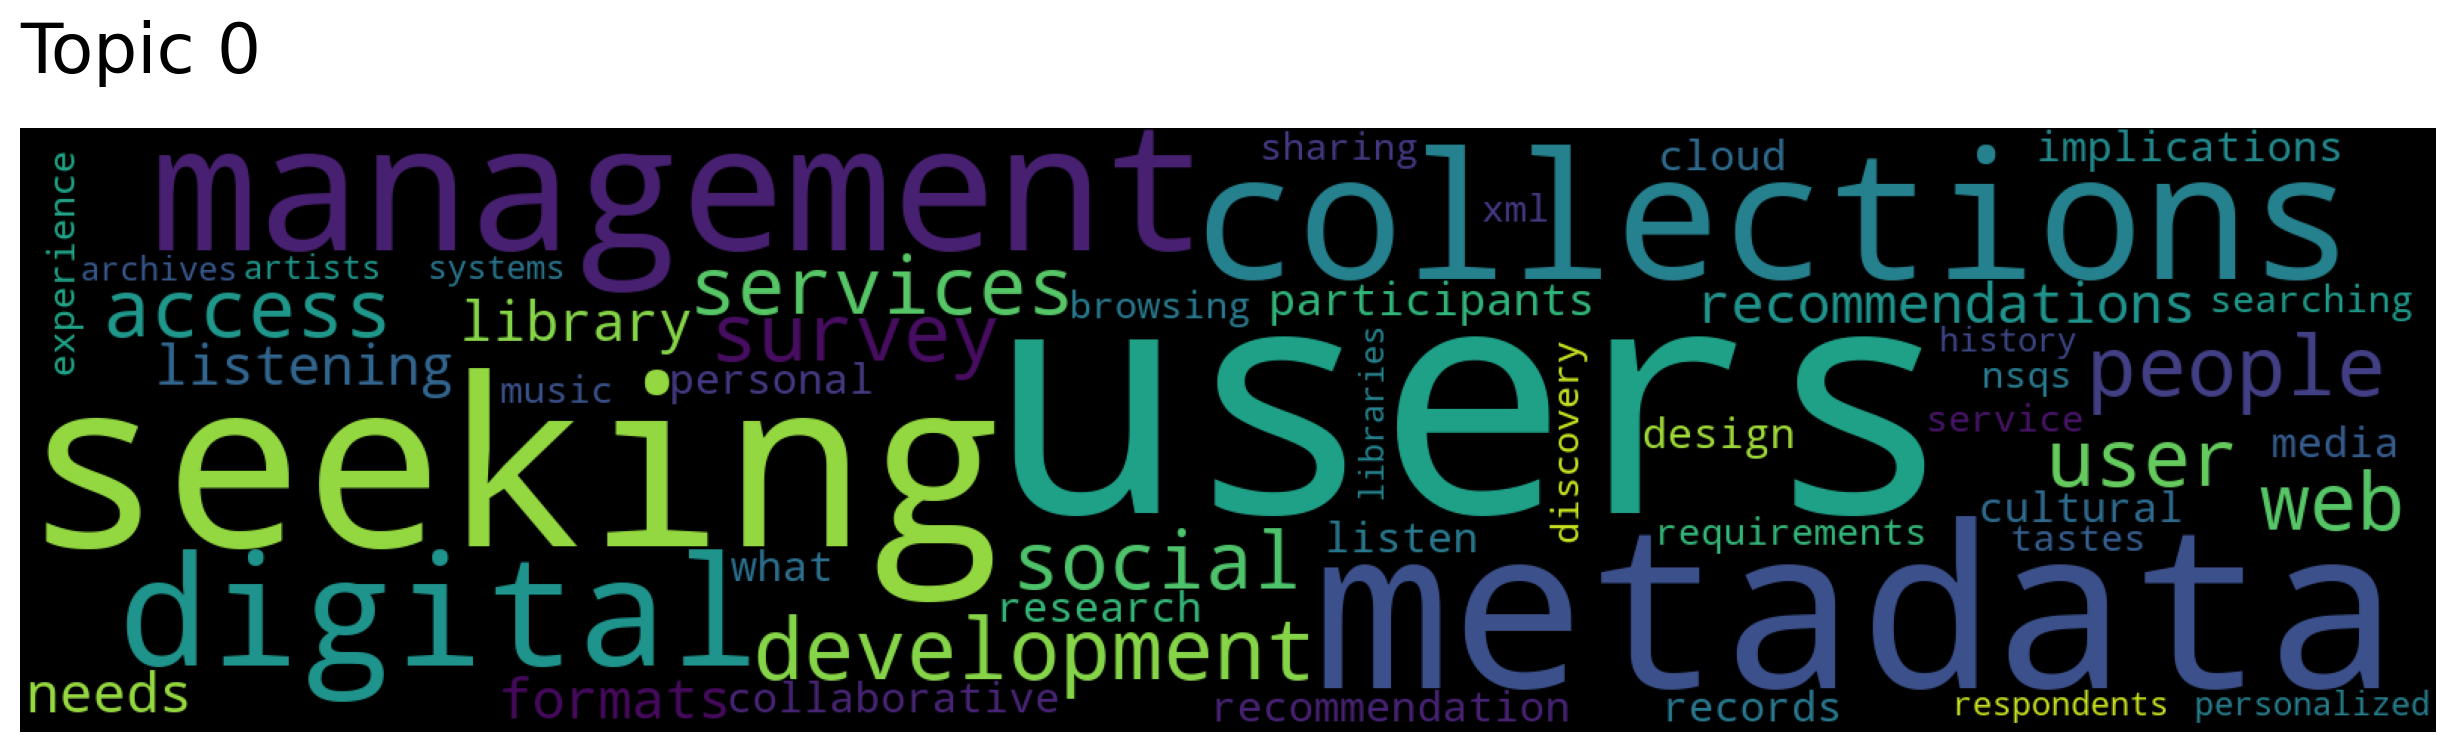

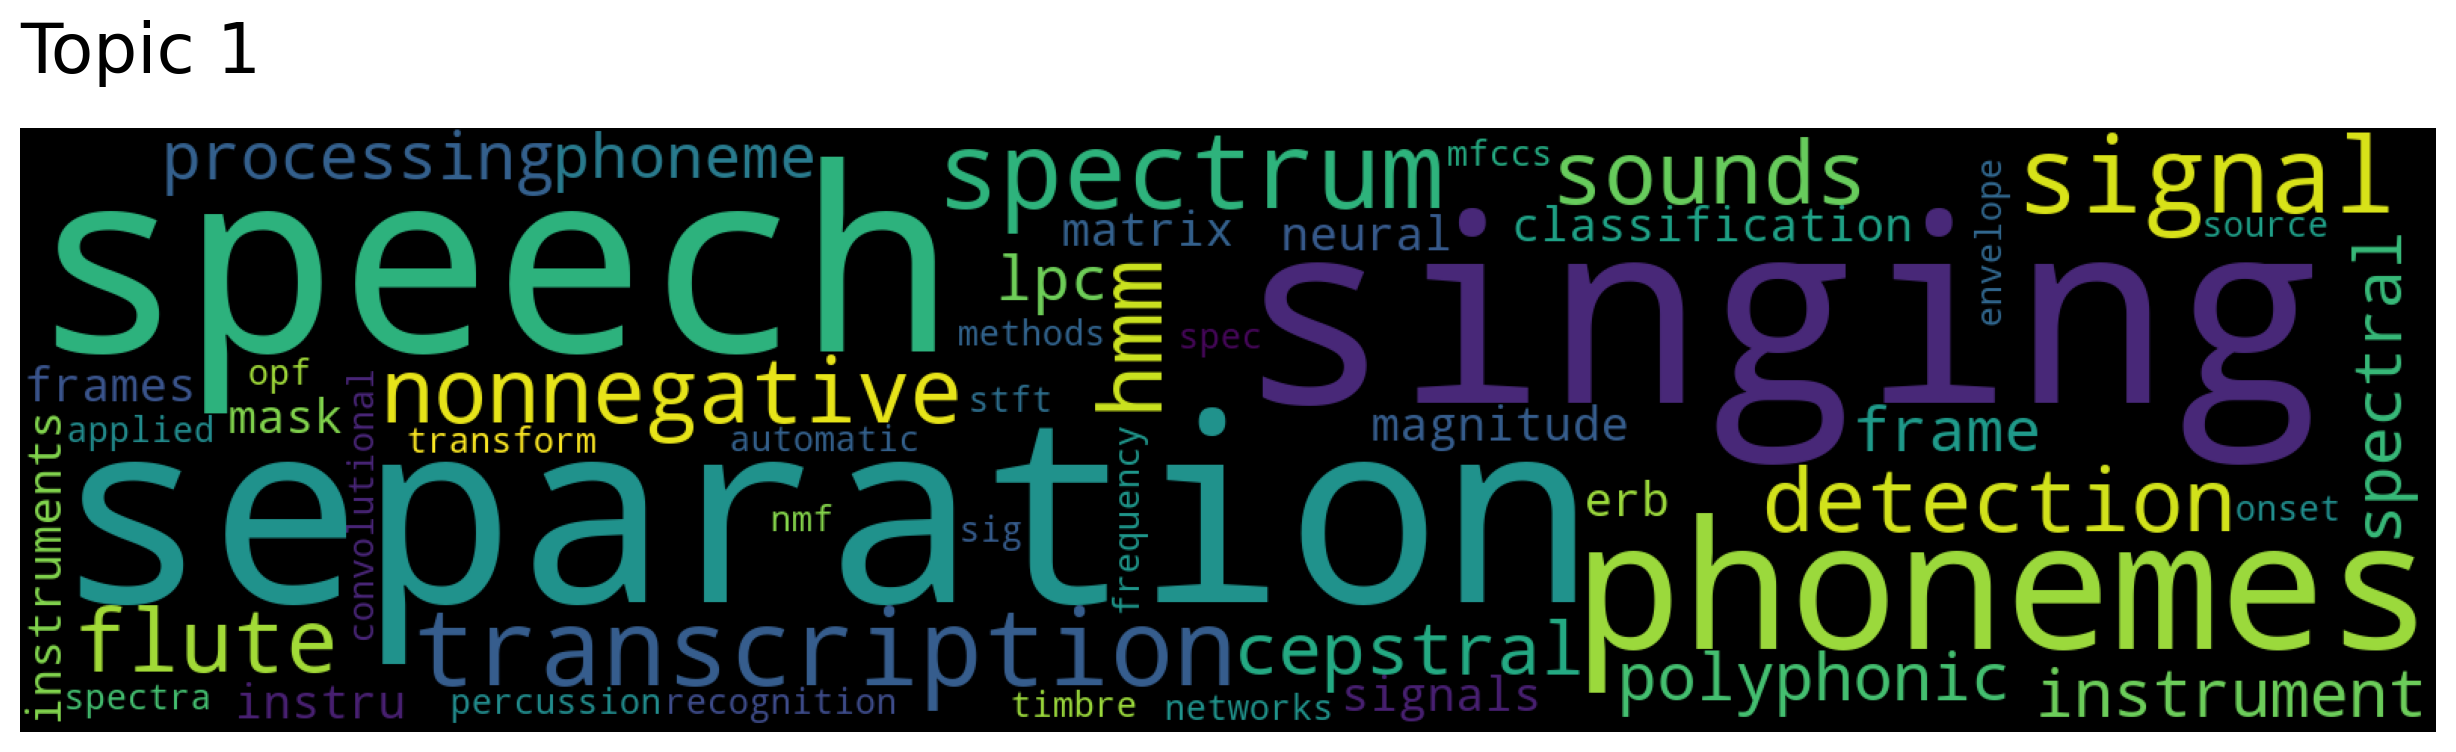

In [ ]:
#Word Clouds for detected topics
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
model.get_documents_topics([88,250,390,400])

(array([1, 1, 0, 0]),
 array([ 0.23671632,  0.27369145, -0.0246885 ,  0.7045255 ], dtype=float32),
 array([['harmonic', 'signals', 'hmm', 'nmf', 'polyphonic', 'spectra',
         'fundamental', 'spectrum', 'frame', 'frequency', 'nonnegative',
         'transcription', 'probabilistic', 'viterbi', 'rwc', 'envelope',
         'klapuri', 'piano', 'beat', 'bayesian', 'signal', 'estimate',
         'tracking', 'method', 'estimation', 'peaks', 'flute', 'sounds',
         'extraction', 'markov', 'algorithm', 'tran', 'esti', 'goto',
         'filter', 'estimated', 'notes', 'transform', 'sparse', 'optimal',
         'components', 'onset', 'chromagram', 'wavelet', 'fourier',
         'factorization', 'percussive', 'auditory', 'applied', 'downbeat'],
        ['harmonic', 'signals', 'hmm', 'nmf', 'polyphonic', 'spectra',
         'fundamental', 'spectrum', 'frame', 'frequency', 'nonnegative',
         'transcription', 'probabilistic', 'viterbi', 'rwc', 'envelope',
         'klapuri', 'piano', 'beat

In [ ]:
model.hierarchical_topic_reduction(2)

[[0], [2, 1]]

In [ ]:
model.get_topic_hierarchy()

[[0], [2, 1]]

In [ ]:
model.search_documents_by_documents([2],3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(array(['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDOWNBEAT TRACKING USING BEAT-SYNCHRONOUS FEATURES AND\nRECURRENT NEURAL NETWORKS\n\nFlorian Krebs, Sebastian Böck, Matthias Dorfer, and Gerhard Widmer\nDepartment of Computational Perception\nJohannes Kepler University Linz, Austria\n\nFlorian.Krebs@jku.at\n\nABSTRACT\n\nIn this paper, we propose a system that extracts the down-\nbeat times from a beat-synchronous audio feature stream\nof a music piece. Two recurrent neural networks are used\nas a front-end: the first one models rhythmic content on\nmultiple frequency bands, while the second one models the\nharmonic content of the signal. The output activations are\nthen combined and fed into a dynamic Bayesian network\nwhich acts as a rhythmical language model. We show on\nseven commonly used datasets of Western music that the\nsystem is able to achieve state-of-the-art results.\n\n1. INTRODUCTION\n\nThe automatic analysis of the metrical structure in an au-\ndio piece is a

In [ ]:
model.search_documents_by_keywords(["Deep","Learning"],5)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(array(['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nULTRA-LIGHT DEEP MIR BY TRIMMING LOTTERY TICKETS\n\nPhilippe Esling, Theis Bazin, Adrien Bitton, Tristan Carsault, Ninon Devis\nIRCAM - Sorbonne Université, CNRS UMR 9912 - 1, place Igor Stravinsky, Paris, France\n\nesling@ircam.fr\n\nABSTRACT\n\nCurrent state-of-the-art results in Music Information\nRetrieval are largely dominated by deep learning ap-\nproaches. These provide unprecedented accuracy across\nall tasks. However, the consistently overlooked downside\nof these models is their stunningly massive complexity,\nwhich seems concomitantly crucial to their success.\n\nIn this paper, we address this issue by proposing a\nmodel pruning method based on the lottery ticket hypothe-\nsis. We modify the original approach to allow for explicitly\nremoving parameters, through structured trimming of en-\ntire units, instead of simply masking individual weights.\nThis leads to models which are effectively lighter in terms\nof size

In [ ]:
model.search_documents_by_topic(1,5)

(array(['\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nISMIR 2008 – Session 1c – Timbre\n\nA REAL-TIME EQUALIZER OF HARMONIC AND PERCUSSIVE\nCOMPONENTS IN MUSIC SIGNALS\n\nNobutaka Ono, Kenichi Miyamoto, Hirokazu Kameoka and Shigeki Sagayama\nDepartment of Information Physics and Computing,\n\nGraduate School of Information Science and Technology, The University of Tokyo\n7-3-1 Hongo Bunkyo-ku, Tokyo, 113-8656, Japan\n\nE-mail: {onono,miyamoto,kameoka,sagayama}@hil.t.u-tokyo.ac.jp\n\nABSTRACT\nIn this paper, we present a real-time equalizer to control a\nvolume balance of harmonic and percussive components in\nmusic signals without a priori knowledge of scores or in-\ncluded instruments. The harmonic and percussive compo-\nnents of music signals have much different structures in the\npower spectrogram domain, the former is horizontal, while\nthe latter is vertical. Exploiting the anisotropy, our methods\nseparate input music signals into them based on 